In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Display a quick overview
print(data.head())

  Month Habitat   Site Location Sex  SexID  Weight  WingL  TarsusL  CORT1  \
0   Feb   Rural  Ocala     Farm   M      2      35    9.1    21.76   5.23   
1  Sept   Urban    GNV      GNV   F      1      37    8.4    20.09   3.05   
2   Feb   Urban  Ocala    Ocala   F      1      37    8.6    19.50   8.73   
3   Dec   Rural    GNV      ACF   F      1      37    8.4    19.36  11.11   
4   Nov   Urban    GNV      GNV   F      1      38    8.4    19.01   1.33   

   CORT2  CORT3  Exploration  Neophobia  Neophilia  Aggression  Boldness  \
0   5.86   6.25      0.87026    1.85823    0.83398     0.43279  -1.35431   
1   5.08   7.26      1.46306   -0.60086   -0.92405     0.72763   1.08221   
2  10.48  19.49      1.94799   -0.05401    0.24467    -1.89158  -0.18457   
3  23.60  24.87      0.06201   -0.54020    0.17969     0.04281   1.08080   
4   1.39  39.82     -0.96196    0.30524   -0.45602    -0.23742   0.56366   

           Personality  
0           Angry Bird  
1           Angry Bird  
2  A 

In [12]:
# Map 'Sex' to numerical values (M=1, F=0)
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})

# Map 'Personality' to numerical values (e.g., Angry Bird=0, A Pretty Chill Bird=1, Standard Bird=2)
personality_mapping = {'Angry Bird': 0, 'A Pretty Chill Bird': 1, 'Standard Bird': 2}
data['Personality'] = data['Personality'].map(personality_mapping)

# Convert other categorical variables to one-hot encoding
data = pd.get_dummies(data, columns=['Habitat', 'Site', 'Location'], drop_first=True)

# Drop any unnecessary columns (if needed)
# For example, if you don't want to include 'Personality' during clustering:
X = data.drop(columns=['Personality', 'Month'])

# Standardize the data for clustering and PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X.head()

Sex  SexID  Weight  WingL  TarsusL  CORT1  CORT2  CORT3  Exploration  \
0    1      2      35    9.1    21.76   5.23   5.86   6.25      0.87026   
1    0      1      37    8.4    20.09   3.05   5.08   7.26      1.46306   
2    0      1      37    8.6    19.50   8.73  10.48  19.49      1.94799   
3    0      1      37    8.4    19.36  11.11  23.60  24.87      0.06201   
4    0      1      38    8.4    19.01   1.33   1.39  39.82     -0.96196   

   Neophobia  Neophilia  Aggression  Boldness  Habitat_Urban  Site_Ocala  \
0    1.85823    0.83398     0.43279  -1.35431          False        True   
1   -0.60086   -0.92405     0.72763   1.08221           True       False   
2   -0.05401    0.24467    -1.89158  -0.18457           True        True   
3   -0.54020    0.17969     0.04281   1.08080          False       False   
4    0.30524   -0.45602    -0.23742   0.56366           True       False   

   Location_Farm  Location_GNV  Location_Ocala  
0           True         False           False  
1          False          True           False  
2          False         False            True  
3          False         False           False  
4          False          True           False

In [14]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster assignments back to the DataFrame
data['Cluster'] = clusters

# Compare clusters to personality groups
print("Confusion Matrix:")
print(pd.crosstab(data['Cluster'], data['Personality']))

# Evaluate clustering performance using Adjusted Rand Index
ari = adjusted_rand_score(data['Personality'], data['Cluster'])
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

Confusion Matrix:
Personality  0  1   2
Cluster              
0            8  4  14
1            4  8   7
2            8  7   7
Adjusted Rand Index (ARI): 0.014


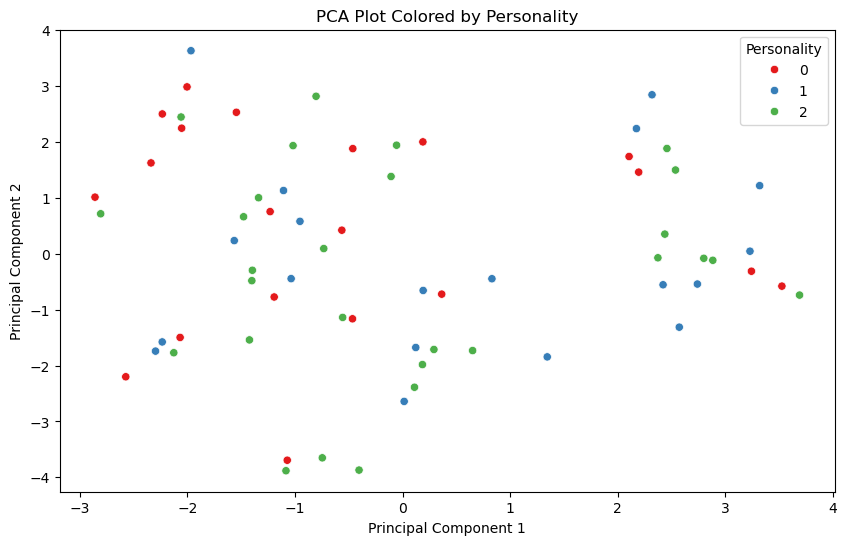

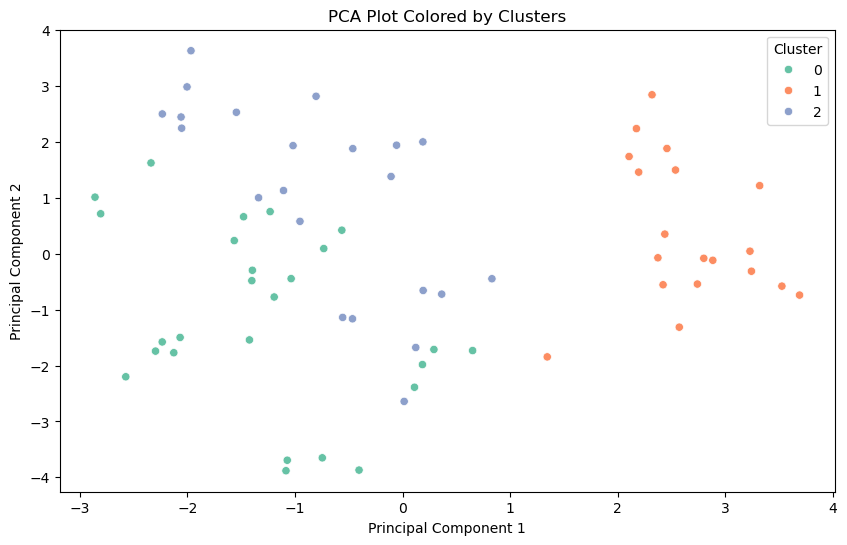

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to the DataFrame
data['PC1'] = X_pca[:, 0]
data['PC2'] = X_pca[:, 1]

# Plot PCA results, colored by personality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=data['Personality'], palette='Set1', data=data)
plt.title("PCA Plot Colored by Personality")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Personality")
plt.show()

# Plot PCA results, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=data['Cluster'], palette='Set2', data=data)
plt.title("PCA Plot Colored by Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

PCA Loadings:
                     PC1       PC2
Sex            -0.198466  0.390176
SexID          -0.198466  0.390176
Weight         -0.063875  0.233305
WingL          -0.253651  0.321325
TarsusL        -0.187262  0.116261
CORT1          -0.234018 -0.383925
CORT2          -0.208690 -0.352956
CORT3          -0.208646 -0.288230
Exploration    -0.000083 -0.039814
Neophobia      -0.235781 -0.151498
Neophilia      -0.220005 -0.235588
Aggression     -0.056386  0.167588
Boldness        0.102323  0.028074
Habitat_Urban   0.364614  0.053071
Site_Ocala     -0.323565  0.125505
Location_Farm  -0.313853  0.178527
Location_GNV    0.467707  0.093509
Location_Ocala -0.057894 -0.034333


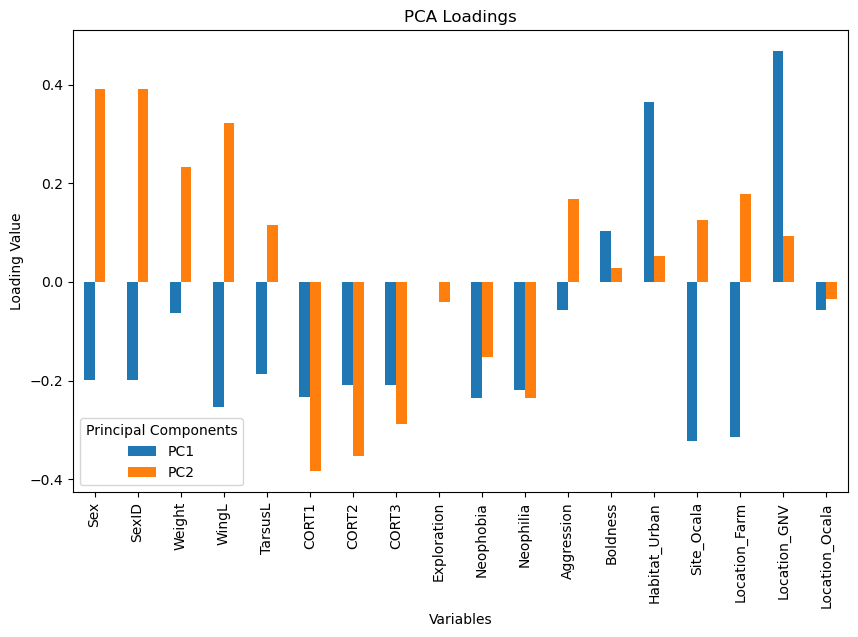

In [16]:
# Get PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)

# Display loadings
print("PCA Loadings:")
print(loadings)

# Plot PCA loadings
loadings.plot(kind='bar', figsize=(10, 6))
plt.title("PCA Loadings")
plt.xlabel("Variables")
plt.ylabel("Loading Value")
plt.legend(title="Principal Components")
plt.show()

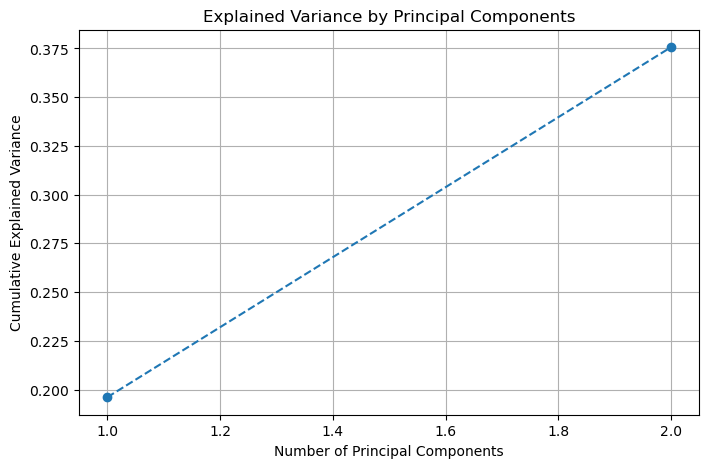

Explained variance by PC1: 0.20
Explained variance by PC2: 0.18


In [17]:
# Plot the explained variance ratio
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Print explained variance for the first two components
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")

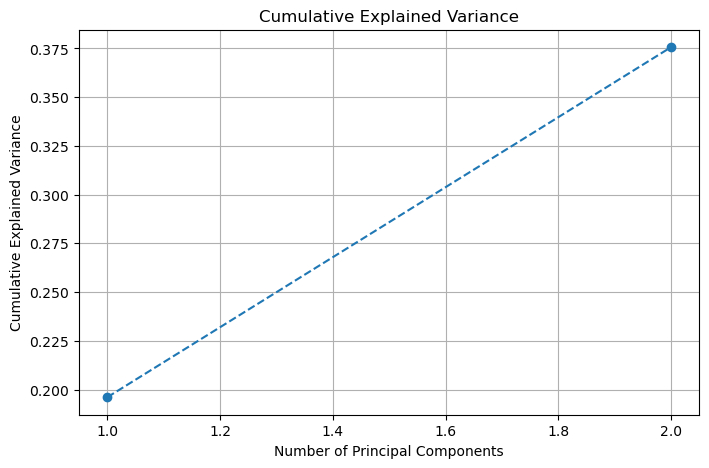

Number of components needed to explain 80% variance: 1


In [18]:
# Calculate cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Print number of components needed to explain 80% variance
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Number of components needed to explain 80% variance: {n_components_80}")

Top Variables Contributing to PC1 and PC2:
                     PC1       PC2  Magnitude
Location_GNV    0.467707  0.093509   0.227494
CORT1          -0.234018 -0.383925   0.202163
Sex            -0.198466  0.390176   0.191626
SexID          -0.198466  0.390176   0.191626
CORT2          -0.208690 -0.352956   0.168129
WingL          -0.253651  0.321325   0.167588
Habitat_Urban   0.364614  0.053071   0.135760
Location_Farm  -0.313853  0.178527   0.130376
CORT3          -0.208646 -0.288230   0.126610
Site_Ocala     -0.323565  0.125505   0.120446
Neophilia      -0.220005 -0.235588   0.103904
Neophobia      -0.235781 -0.151498   0.078544
Weight         -0.063875  0.233305   0.058511
TarsusL        -0.187262  0.116261   0.048583
Aggression     -0.056386  0.167588   0.031265
Boldness        0.102323  0.028074   0.011258
Location_Ocala -0.057894 -0.034333   0.004530
Exploration    -0.000083 -0.039814   0.001585


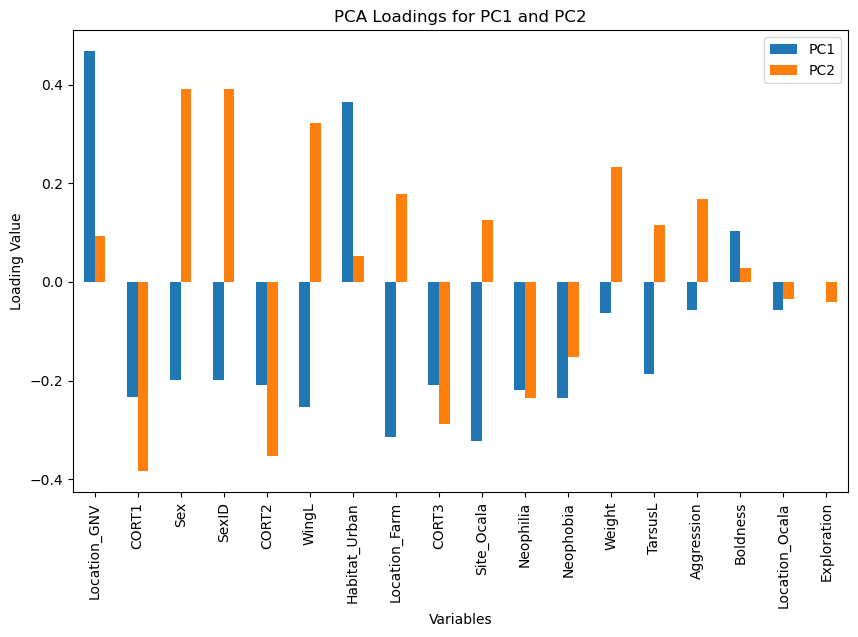

In [19]:
# PCA Loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
loadings['Magnitude'] = loadings['PC1']**2 + loadings['PC2']**2
loadings = loadings.sort_values('Magnitude', ascending=False)

print("Top Variables Contributing to PC1 and PC2:")
print(loadings)

# Plot top variables
loadings[['PC1', 'PC2']].plot(kind='bar', figsize=(10, 6))
plt.title("PCA Loadings for PC1 and PC2")
plt.xlabel("Variables")
plt.ylabel("Loading Value")
plt.show()

In [20]:
# Drop low-contribution variables based on PCA loadings
variables_to_drop = ['Neophobia', 'Weight', 'TarsusL', 'Aggression', 'Boldness', 'Location_Ocala', 'Exploration']
X_reduced = X.drop(columns=variables_to_drop)

# Standardize the reduced dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_reduced_scaled = scaler.fit_transform(X_reduced)

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_reduced = kmeans.fit_predict(X_reduced_scaled)

# Add cluster assignments to the dataset
data['Cluster_Reduced'] = clusters_reduced

# Evaluate clustering performance
ari_reduced = adjusted_rand_score(data['Personality'], data['Cluster_Reduced'])
print(f"Adjusted Rand Index (Reduced Dataset): {ari_reduced:.3f}")

Adjusted Rand Index (Reduced Dataset): -0.016


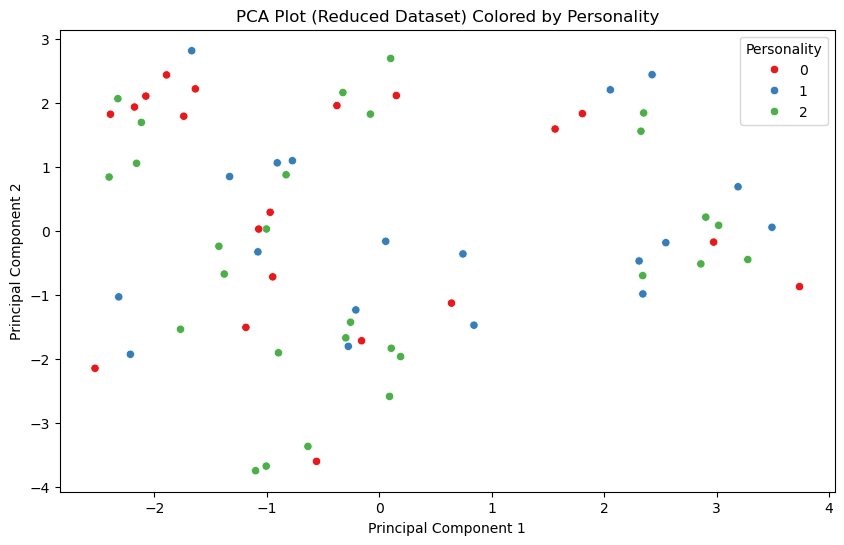

In [22]:
from sklearn.decomposition import PCA

# Perform PCA
pca_reduced = PCA(n_components=2)
X_pca_reduced = pca_reduced.fit_transform(X_reduced_scaled)

# Add PCA results to the DataFrame
data['PC1_Reduced'] = X_pca_reduced[:, 0]
data['PC2_Reduced'] = X_pca_reduced[:, 1]

# Scatterplot of PCA results (Reduced Dataset)
import matplotlib.pyplot as plt
import seaborn as sns

# PCA plot colored by personality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1_Reduced', y='PC2_Reduced', hue=data['Personality'], palette='Set1', data=data)
plt.title("PCA Plot (Reduced Dataset) Colored by Personality")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Personality")
plt.show()

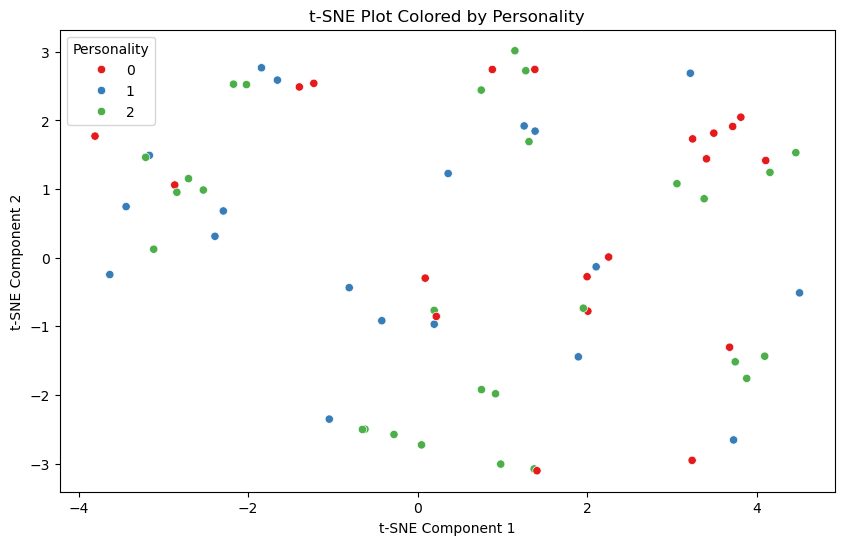

In [23]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_reduced_scaled)

# Scatterplot of t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data['Personality'], palette='Set1')
plt.title("t-SNE Plot Colored by Personality")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Personality")
plt.show()

In [24]:
from sklearn.mixture import GaussianMixture

# Apply GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(X_reduced_scaled)

# Add GMM cluster assignments to the dataset
data['GMM_Cluster'] = gmm_clusters

# Evaluate GMM clustering
ari_gmm = adjusted_rand_score(data['Personality'], gmm_clusters)
print(f"Adjusted Rand Index (GMM): {ari_gmm:.3f}")

Adjusted Rand Index (GMM): -0.016


In [25]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_reduced_scaled)

# Add DBSCAN cluster assignments to the dataset
data['DBSCAN_Cluster'] = dbscan_clusters

# Evaluate DBSCAN clustering
ari_dbscan = adjusted_rand_score(data['Personality'], dbscan_clusters)
print(f"Adjusted Rand Index (DBSCAN): {ari_dbscan:.3f}")

Adjusted Rand Index (DBSCAN): 0.014


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        28

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



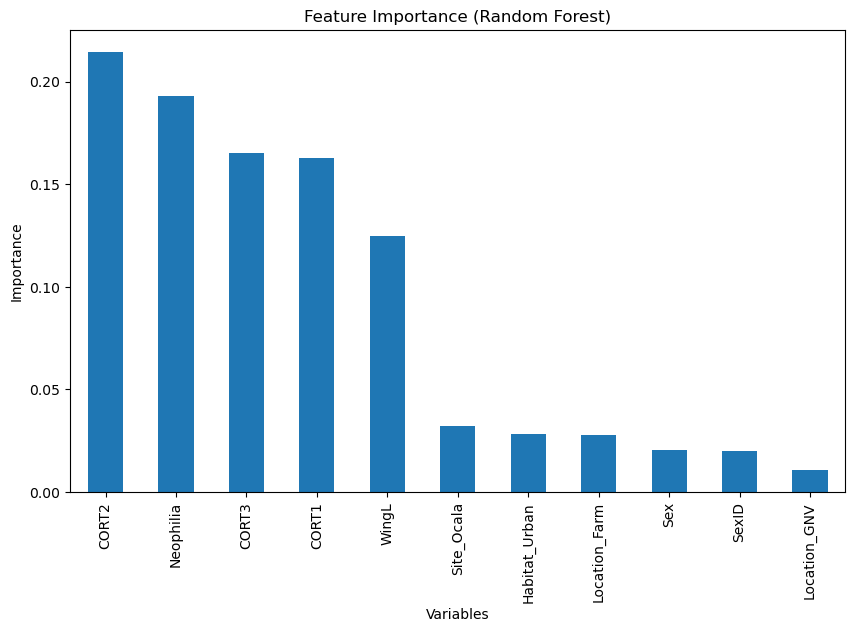

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_reduced_scaled, data['Personality'])

# Predict personality
y_pred = rf.predict(X_reduced_scaled)

# Classification report
print("Classification Report:")
print(classification_report(data['Personality'], y_pred))

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X_reduced.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.show()

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Test different eps and min_samples values
best_ari = -1
best_params = {}

for eps in [0.5, 1.0, 1.5, 2.0]:
    for min_samples in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_reduced_scaled)
        ari = adjusted_rand_score(data['Personality'], clusters)
        
        if ari > best_ari:
            best_ari = ari
            best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best ARI: {best_ari:.3f} with parameters: {best_params}")

Best ARI: 0.024 with parameters: {'eps': 1.0, 'min_samples': 3}


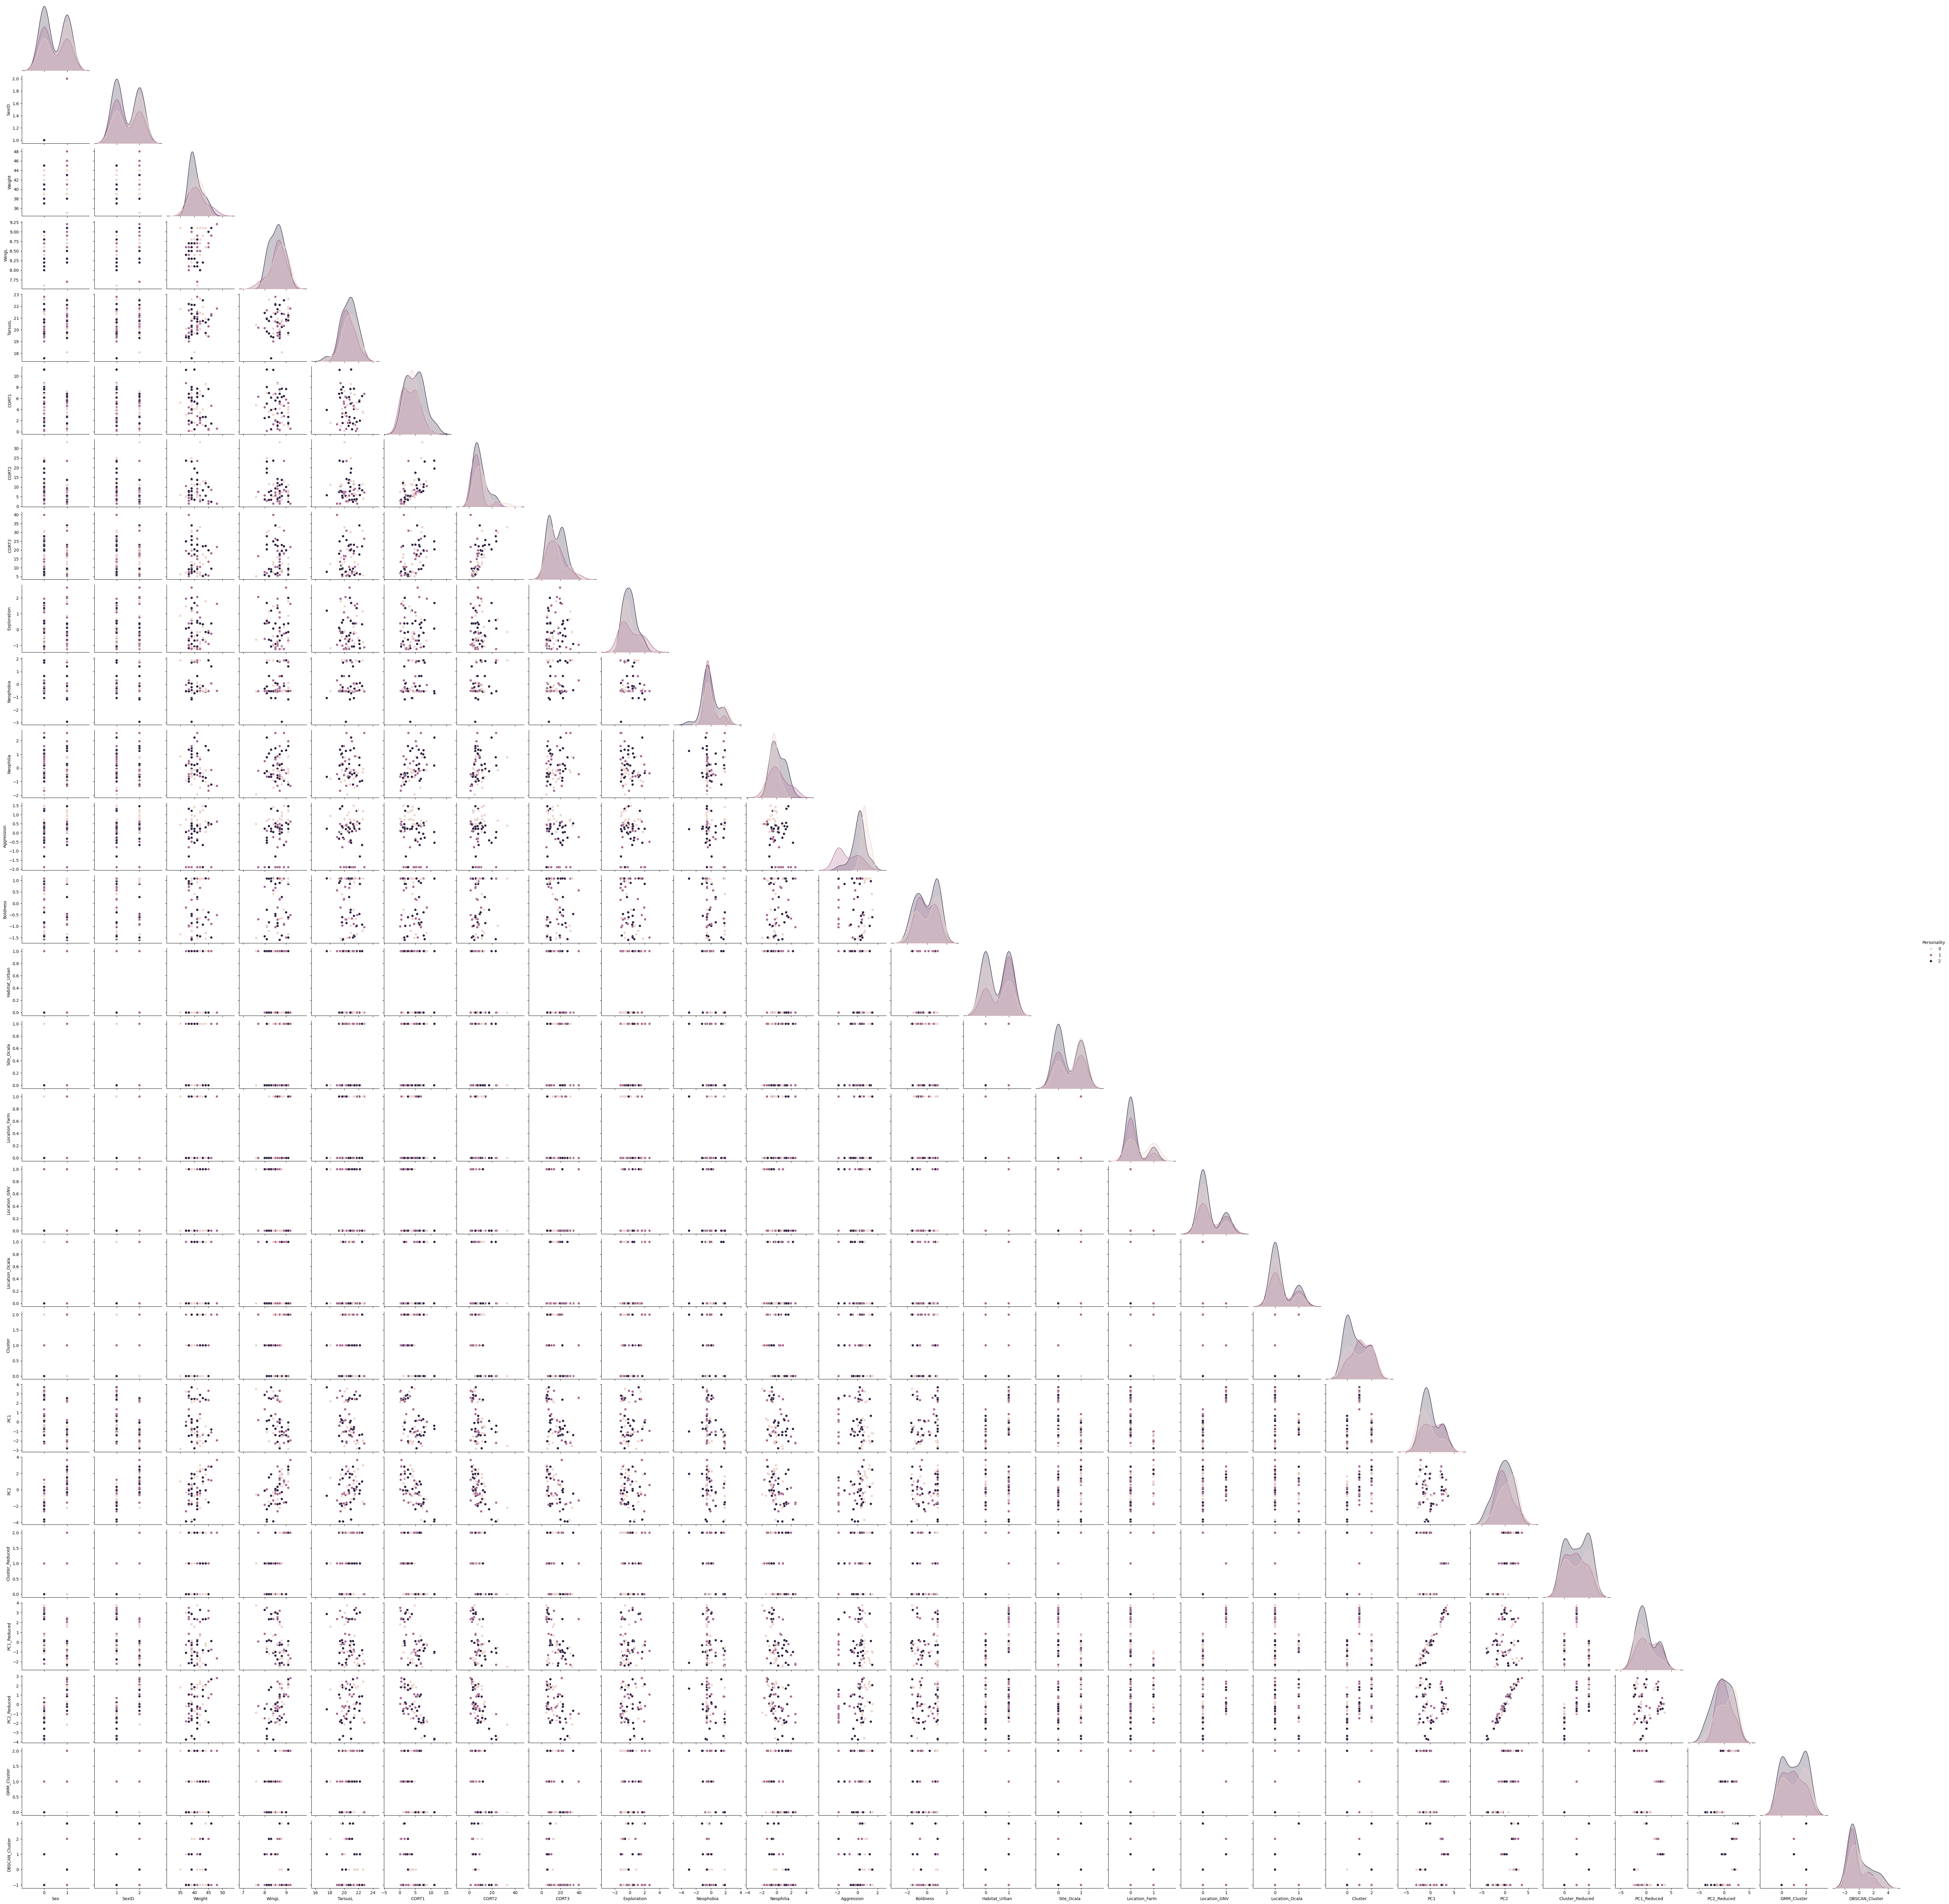

In [28]:
# Pairplot to visualize overlap between personality groups
sns.pairplot(data, hue='Personality', diag_kind='kde', corner=True)
plt.show()

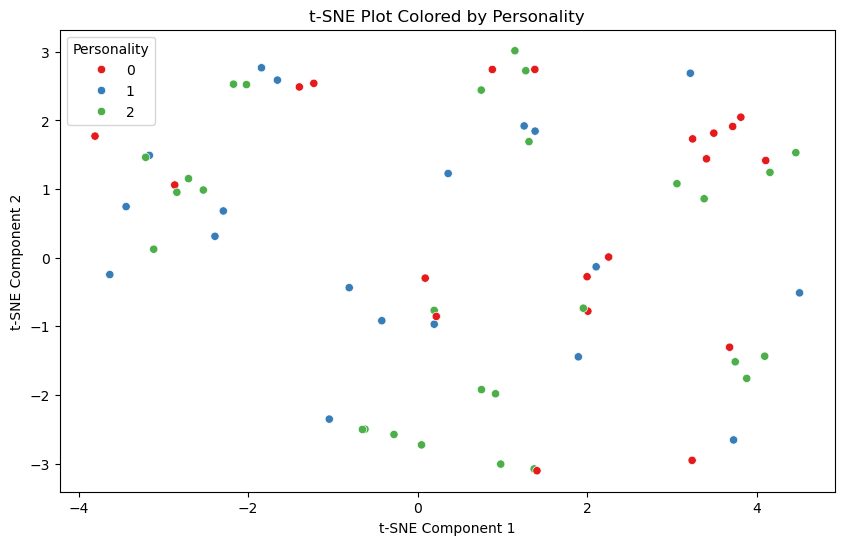

In [29]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_reduced_scaled)

# Visualize t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data['Personality'], palette='Set1')
plt.title("t-SNE Plot Colored by Personality")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Personality")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        28

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



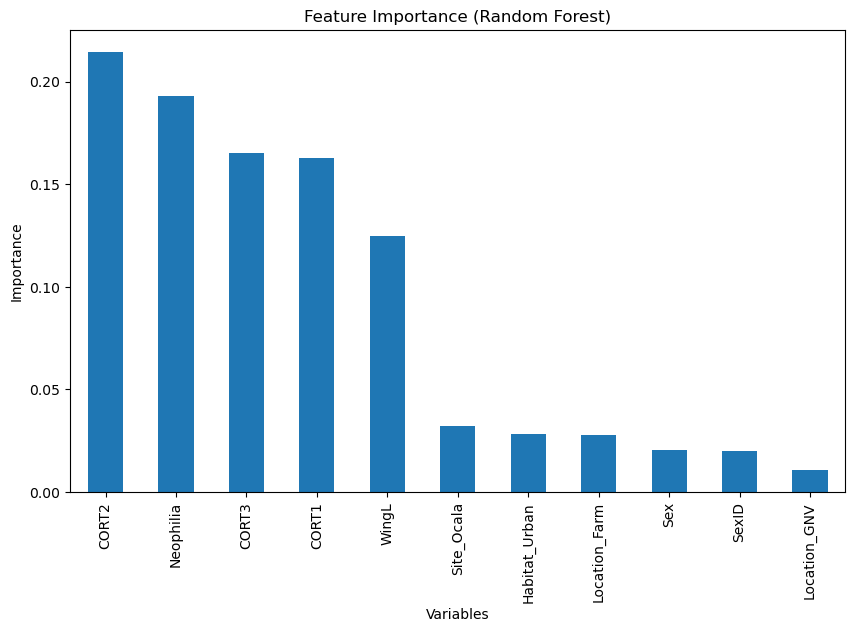

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_reduced_scaled, data['Personality'])

# Predict personality
y_pred = rf.predict(X_reduced_scaled)

# Classification report
print("Classification Report:")
print(classification_report(data['Personality'], y_pred))

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X_reduced.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.show()

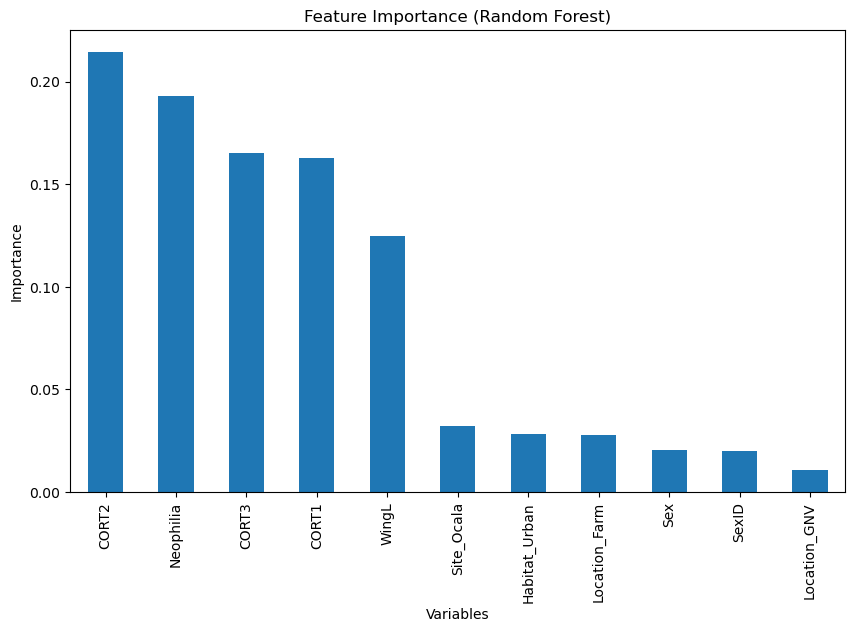

In [31]:
# Feature importance
importances = pd.Series(rf.feature_importances_, index=X_reduced.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced_scaled, data['Personality'], test_size=0.3, random_state=42)

# Train the random forest model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.33      0.11      0.17         9
           2       0.33      0.43      0.38         7

    accuracy                           0.38        21
   macro avg       0.37      0.45      0.37        21
weighted avg       0.36      0.38      0.33        21



Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.33      0.11      0.17         9
           2       0.33      0.43      0.38         7

    accuracy                           0.38        21
   macro avg       0.37      0.45      0.37        21
weighted avg       0.36      0.38      0.33        21



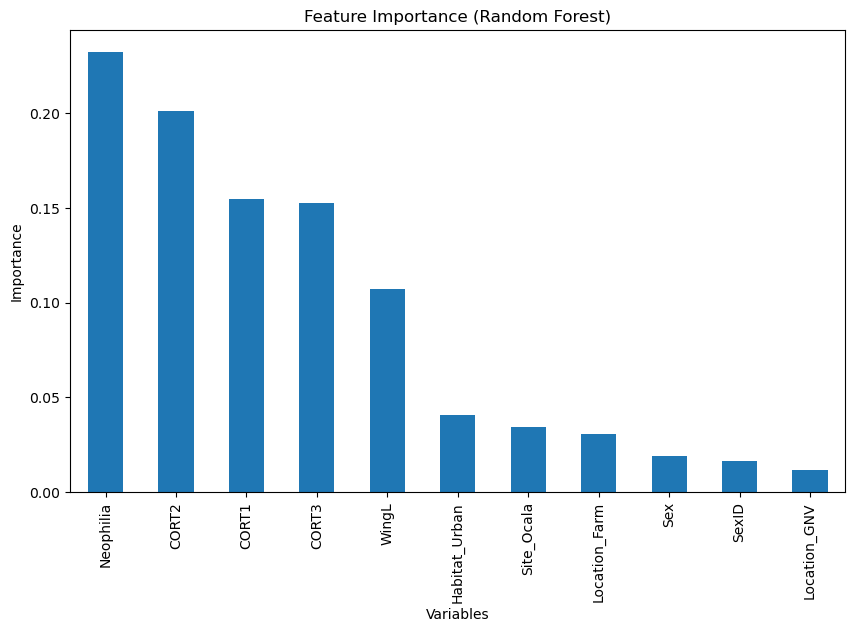

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced_scaled, data['Personality'], test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the classifier on the training set
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Print the classification report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

# Plot feature importance
importances = pd.Series(rf.feature_importances_, index=X_reduced.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.show()

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.62      0.56      0.59         9
           2       0.29      0.29      0.29         7

    accuracy                           0.48        21
   macro avg       0.47      0.48      0.47        21
weighted avg       0.48      0.48      0.48        21



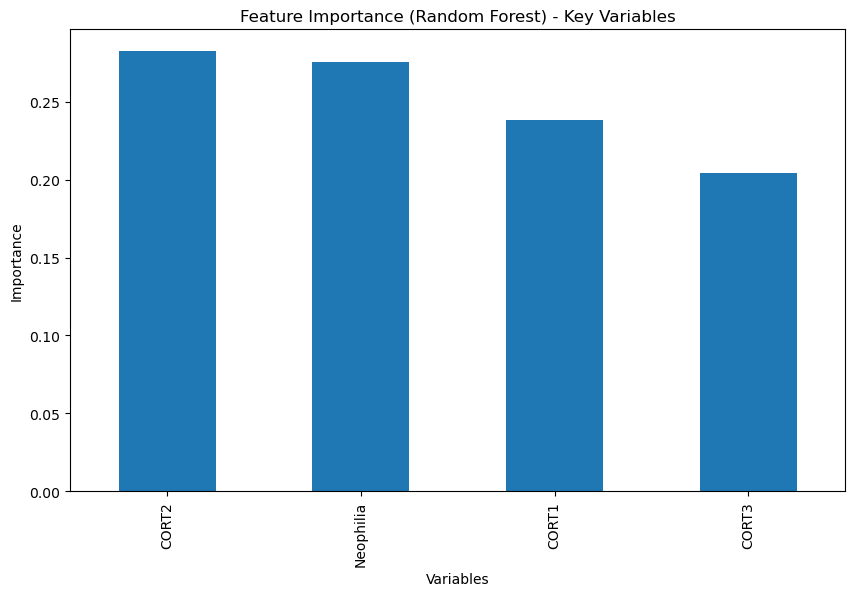

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to only include the most important variables
key_features = ['Neophilia', 'CORT2', 'CORT1', 'CORT3']
X_key = data[key_features]  # Only keep the selected features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_key, data['Personality'], test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the classifier on the training set
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Print the classification report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

# Plot feature importance for the selected variables
importances = pd.Series(rf.feature_importances_, index=key_features)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance (Random Forest) - Key Variables")
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.show()

Adjusted Rand Index (ARI): -0.021

Confusion Matrix:
Personality   0  1   2
Cluster_Key           
0             3  3   7
1            12  9  12
2             5  7   9


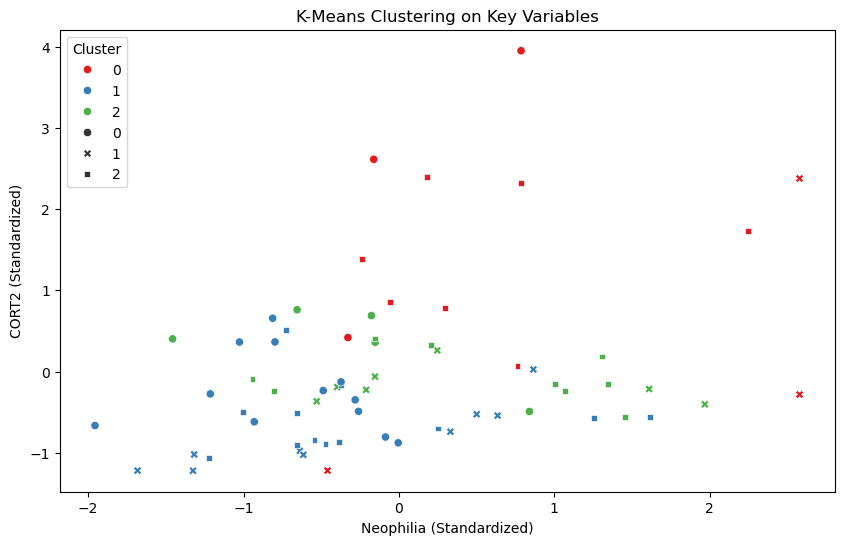

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Subset the dataset to include only the selected key variables
key_features = ['Neophilia', 'CORT2', 'CORT1', 'CORT3']
X_key = data[key_features]

# Standardize the data
scaler = StandardScaler()
X_key_scaled = scaler.fit_transform(X_key)

# Apply k-means clustering with 3 clusters (matching the 3 personality groups)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_key_scaled)

# Add cluster assignments to the dataset
data['Cluster_Key'] = clusters

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(data['Personality'], clusters)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

# Create a confusion matrix to compare clusters with personality groups
conf_matrix = pd.crosstab(data['Cluster_Key'], data['Personality'])
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the clusters in 2D using the first two variables (Neophilia and CORT2)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_key_scaled[:, 0], y=X_key_scaled[:, 1], hue=clusters, palette='Set1', style=data['Personality'])
plt.title("K-Means Clustering on Key Variables")
plt.xlabel("Neophilia (Standardized)")
plt.ylabel("CORT2 (Standardized)")
plt.legend(title="Cluster")
plt.show()

In [39]:
# Load dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Display a quick overview
print(data.describe())

           SexID     Weight      WingL    TarsusL      CORT1      CORT2  \
count  67.000000  67.000000  67.000000  67.000000  67.000000  67.000000   
mean    1.492537  40.671642   8.605970  20.667164   4.209701   8.881791   
std     0.503718   2.518947   0.357974   1.045023   2.675439   6.181532   
min     1.000000  35.000000   7.600000  17.580000   0.130000   1.380000   
25%     1.000000  39.000000   8.400000  19.970000   1.690000   5.210000   
50%     1.000000  41.000000   8.700000  20.700000   4.100000   7.440000   
75%     2.000000  42.000000   8.800000  21.385000   6.180000  11.115000   
max     2.000000  48.000000   9.200000  22.800000  11.180000  33.140000   

           CORT3   Exploration     Neophobia     Neophilia    Aggression  \
count  67.000000  6.700000e+01  6.700000e+01  6.700000e+01  6.700000e+01   
mean   15.060299  1.657049e-17  1.492537e-07  2.985075e-07  1.492537e-07   
std     8.561059  9.999999e-01  9.999994e-01  1.000000e+00  9.999992e-01   
min     5.080000 -1.

In [ ]:
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})
personality_mapping = {'Angry Bird': 0, 'A Pretty Chill Bird': 1, 'Standard Bird': 2}
data['Personality'] = data['Personality'].map(personality_mapping)

X = data.drop(columns=['Personality', 'Month'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

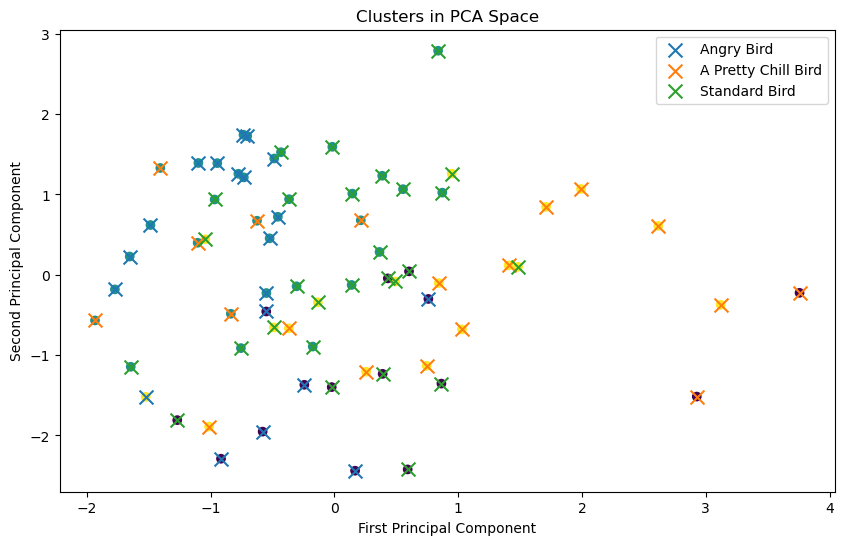

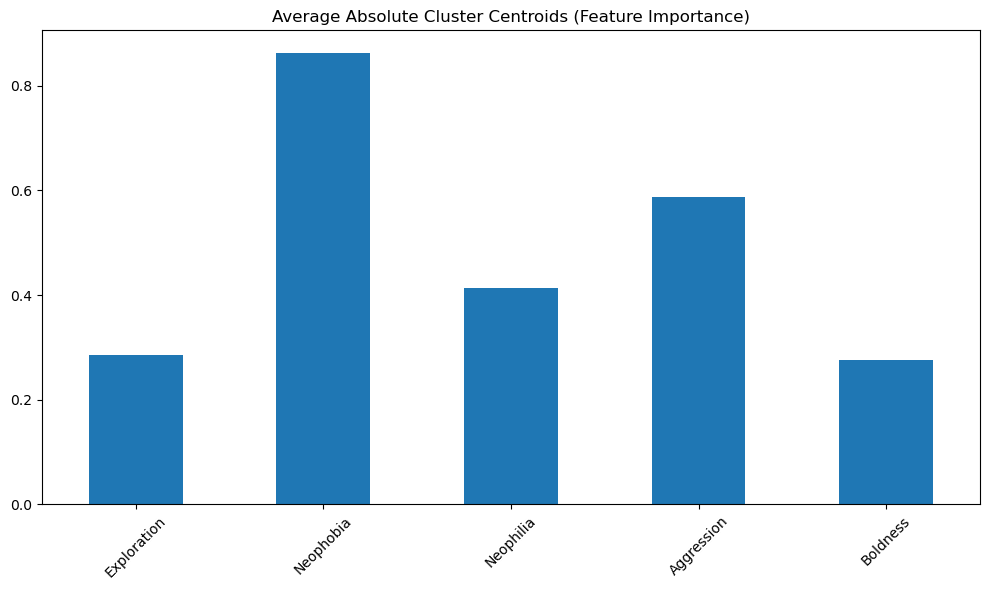


PCA explained variance ratio:
[0.27589731 0.26888967 0.20499177 0.13322664 0.11699461]

Contingency table (Personality vs Clusters):
Cluster              0   1   2
Personality                   
A Pretty Chill Bird  2   6  11
Angry Bird           6  13   1
Standard Bird        7  15   6


In [40]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('data.csv')

# Select features for clustering
features = ['Exploration', 'Neophobia', 'Neophilia', 'Aggression', 'Boldness']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)
data['PC1'] = pca_result[:, 0]
data['PC2'] = pca_result[:, 1]

# Plot 1: Compare clusters with personality types
plt.figure(figsize=(10, 6))
plt.scatter(data['PC1'], data['PC2'], c=clusters, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Clusters in PCA Space')
for i, personality in enumerate(data['Personality'].unique()):
    mask = data['Personality'] == personality
    plt.scatter(data.loc[mask, 'PC1'], data.loc[mask, 'PC2'], 
                marker='x', s=100, label=personality)
plt.legend()
plt.show()

# Plot 2: Feature importance for clustering
plt.figure(figsize=(10, 6))
importance = np.abs(kmeans.cluster_centers_)
importance_df = pd.DataFrame(importance, columns=features)
importance_df.mean().plot(kind='bar')
plt.title('Average Absolute Cluster Centroids (Feature Importance)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print explained variance ratio for PCA
print("\nPCA explained variance ratio:")
print(pca.explained_variance_ratio_)

# Create contingency table
contingency = pd.crosstab(data['Personality'], data['Cluster'])
print("\nContingency table (Personality vs Clusters):")
print(contingency)

In [46]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
import textwrap

# Load data
data = pd.read_csv('data.csv')

# Create dummy variables for categorical columns
categorical_cols = ['Habitat', 'Site', 'Location', 'Sex']
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Select features for clustering (excluding Month and Personality)
features = ['Weight', 'WingL', 'TarsusL', 'CORT1', 'CORT2', 'CORT3',
           'Exploration', 'Neophobia', 'Neophilia', 'Aggression', 'Boldness'] + \
           [col for col in data_encoded.columns if any(x in col for x in categorical_cols)]

X = data_encoded[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)
data['PC1'] = pca_result[:, 0]
data['PC2'] = pca_result[:, 1]

# Plot 1: Compare clusters with personality types
plt.figure(figsize=(12, 8))
plt.scatter(data['PC1'], data['PC2'], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Clusters in PCA Space')
for i, personality in enumerate(data['Personality'].unique()):
    mask = data['Personality'] == personality
    plt.scatter(data.loc[mask, 'PC1'], data.loc[mask, 'PC2'], 
                marker='x', s=100, label=personality)
plt.legend()
plt.show()

# Plot 2: Feature importance for clustering
plt.figure(figsize=(15, 6))
importance = np.abs(kmeans.cluster_centers_)
importance_df = pd.DataFrame(importance, columns=features)
importance_df.mean().plot(kind='bar')
plt.title('Average Absolute Cluster Centroids (Feature Importance)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print explained variance ratio for first few components
print("\nPCA explained variance ratio (first 5 components):")
print(pca.explained_variance_ratio_[:5])

# Create contingency table
contingency = pd.crosstab(data['Personality'], data['Cluster'])
print("\nContingency table (Personality vs Clusters):")
print(contingency)

# Calculate feature correlations with first two PCs
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(features))],
    index=features
)

print("\nTop 5 features contributing to PC1:")
print(loadings['PC1'].sort_values(key=abs, ascending=False).head())
print("\nTop 5 features contributing to PC2:")
print(loadings['PC2'].sort_values(key=abs, ascending=False).head())

ModuleNotFoundError: No module named 'fpdf'

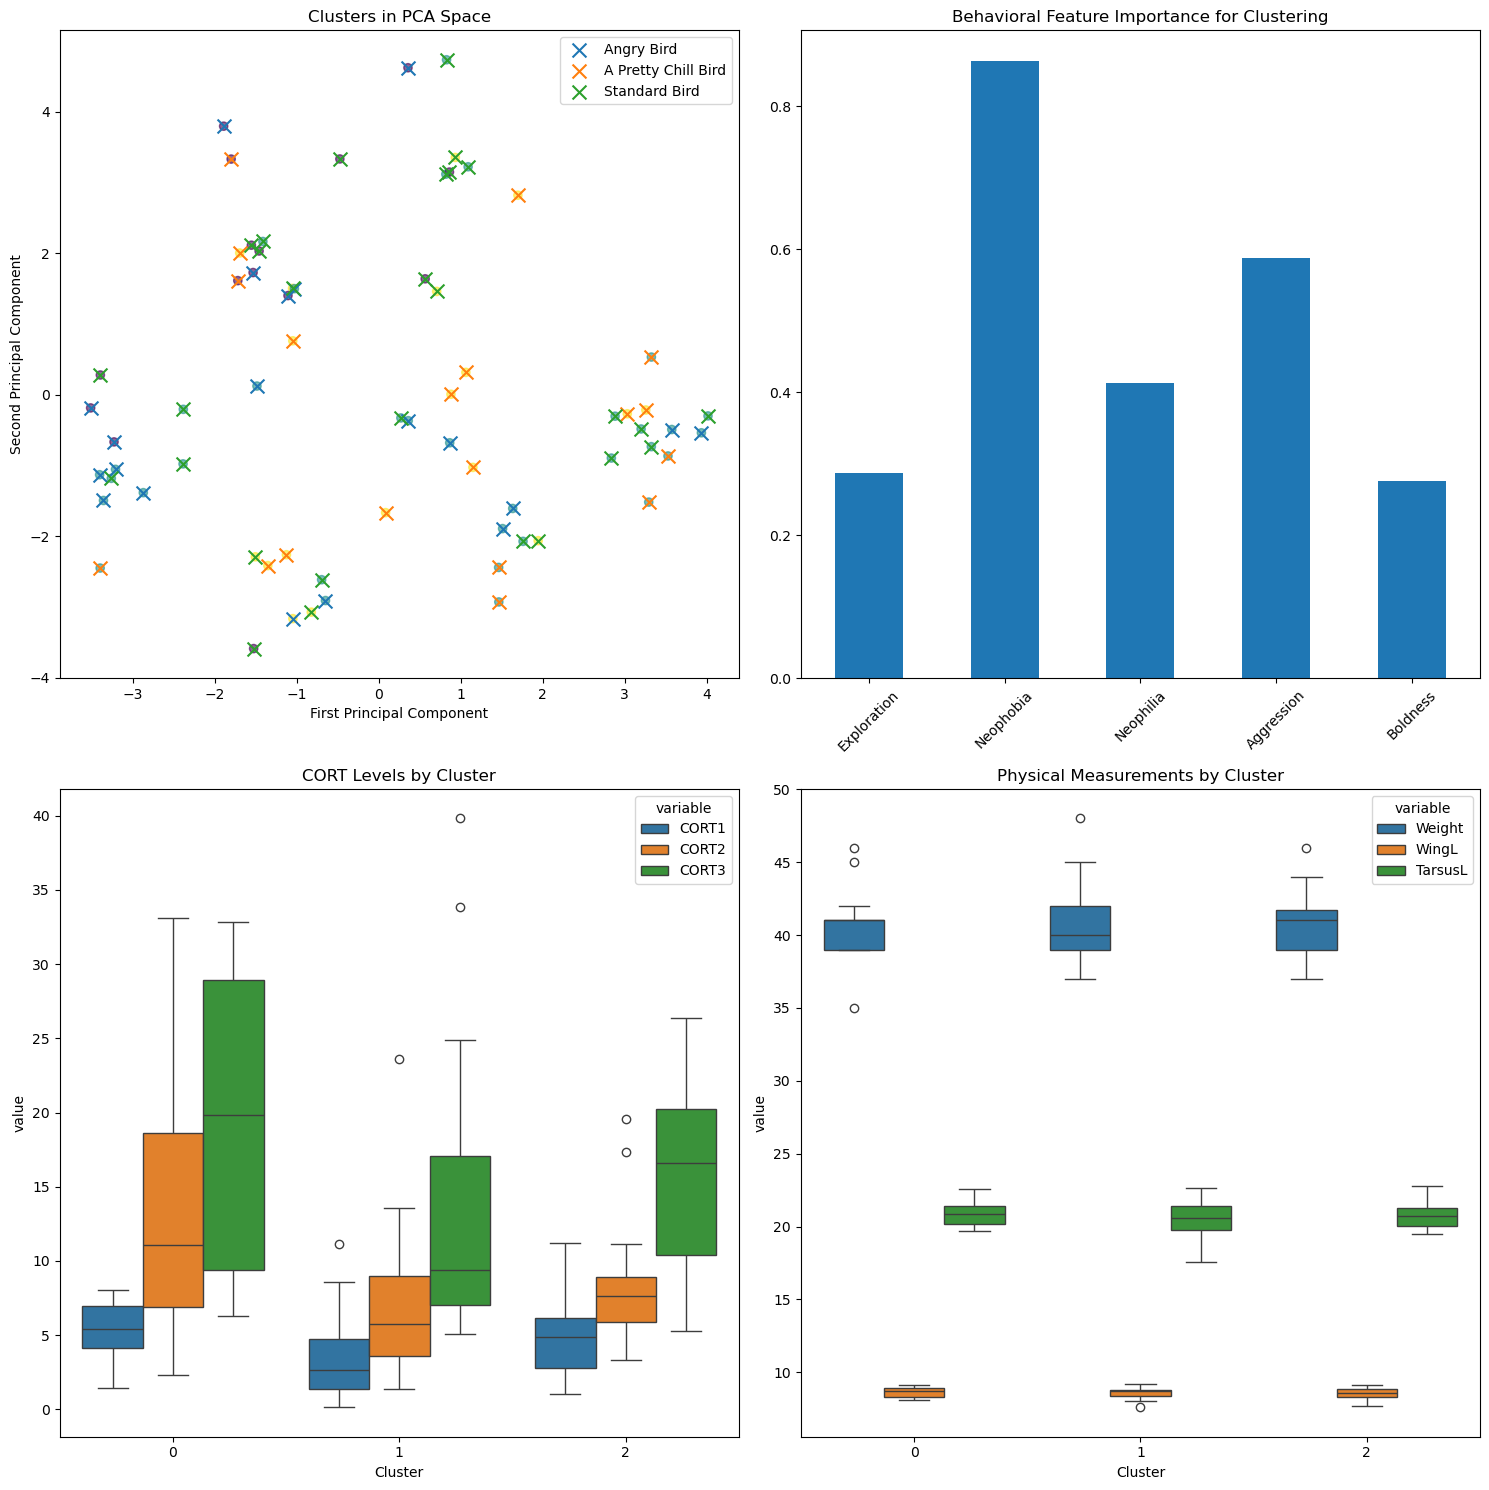


PCA explained variance ratio (first 5 components):
[0.2122018  0.19243364 0.14561592 0.09683167 0.06227666]

Contingency table (Personality vs Clusters):
Cluster              0   1   2
Personality                   
A Pretty Chill Bird  2   6  11
Angry Bird           6  13   1
Standard Bird        7  15   6

Correlations between behavioral and physiological variables:
               Weight     WingL   TarsusL     CORT1     CORT2     CORT3
Exploration -0.063624 -0.044797 -0.031065  0.076719  0.038397  0.037768
Neophobia    0.011043  0.063157  0.158978  0.214833  0.395748  0.316082
Neophilia   -0.220721  0.046029  0.025871  0.422459  0.298416  0.220979
Aggression   0.074334  0.191579 -0.015456 -0.154573 -0.015063 -0.098149
Boldness    -0.143693  0.059476 -0.238835 -0.093350  0.086955 -0.078615

Cluster characteristics (mean values of behavioral features):
         Exploration  Neophobia  Neophilia  Aggression  Boldness
Cluster                                                         
0  

In [42]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('data.csv')

# Split features into behavioral and supplementary
behavioral_features = ['Exploration', 'Neophobia', 'Neophilia', 'Aggression', 'Boldness']
physiological_features = ['Weight', 'WingL', 'TarsusL', 'CORT1', 'CORT2', 'CORT3']

# Create dummy variables for categorical columns
categorical_cols = ['Habitat', 'Site', 'Location', 'Sex']
data_encoded = pd.get_dummies(data, columns=categorical_cols)
categorical_features = [col for col in data_encoded.columns if any(x in col for x in categorical_cols)]

# Perform clustering on behavioral features
X_behavioral = data[behavioral_features]
scaler_behavioral = StandardScaler()
X_behavioral_scaled = scaler_behavioral.fit_transform(X_behavioral)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_behavioral_scaled)
data['Cluster'] = clusters

# Prepare all features for PCA
all_features = behavioral_features + physiological_features + categorical_features
X_all = data_encoded[all_features]
scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X_all)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_all_scaled)
data['PC1'] = pca_result[:, 0]
data['PC2'] = pca_result[:, 1]

# Create plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# Plot 1: Clusters in PCA space
scatter = ax1.scatter(data['PC1'], data['PC2'], c=clusters, cmap='viridis', alpha=0.6)
for i, personality in enumerate(data['Personality'].unique()):
    mask = data['Personality'] == personality
    ax1.scatter(data.loc[mask, 'PC1'], data.loc[mask, 'PC2'], 
                marker='x', s=100, label=personality)
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('Clusters in PCA Space')
ax1.legend()

# Plot 2: Feature importance for clustering (behavioral only)
importance = np.abs(kmeans.cluster_centers_)
importance_df = pd.DataFrame(importance, columns=behavioral_features)
importance_df.mean().plot(kind='bar', ax=ax2)
ax2.set_title('Behavioral Feature Importance for Clustering')
ax2.set_xticklabels(behavioral_features, rotation=45)

# Plot 3: CORT levels by cluster
data_melted = pd.melt(data, id_vars=['Cluster'], value_vars=['CORT1', 'CORT2', 'CORT3'])
sns.boxplot(data=data_melted, x='Cluster', y='value', hue='variable', ax=ax3)
ax3.set_title('CORT Levels by Cluster')

# Plot 4: Physical measurements by cluster
data_melted = pd.melt(data, id_vars=['Cluster'], value_vars=['Weight', 'WingL', 'TarsusL'])
sns.boxplot(data=data_melted, x='Cluster', y='value', hue='variable', ax=ax4)
ax4.set_title('Physical Measurements by Cluster')

plt.tight_layout()
plt.show()

# Print statistics
print("\nPCA explained variance ratio (first 5 components):")
print(pca.explained_variance_ratio_[:5])

print("\nContingency table (Personality vs Clusters):")
print(pd.crosstab(data['Personality'], data['Cluster']))

# Calculate correlations between behavioral and physiological variables
print("\nCorrelations between behavioral and physiological variables:")
correlations = data[behavioral_features + physiological_features].corr()
behavioral_physio_corr = correlations.iloc[:len(behavioral_features), len(behavioral_features):]
print(behavioral_physio_corr)

# Print cluster characteristics
print("\nCluster characteristics (mean values of behavioral features):")
print(data.groupby('Cluster')[behavioral_features].mean())

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
data = pd.read_csv('data.csv')
behavioral_features = ['Exploration', 'Neophobia', 'Neophilia', 'Aggression', 'Boldness']
X = data[behavioral_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)
data['PC1'] = pca_result[:, 0]
data['PC2'] = pca_result[:, 1]

# Create publication-quality plots (Q2 & Q3)


# Cluster Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['PC1'], data['PC2'], c=clusters, cmap='viridis', 
                     alpha=0.6, s=100)
for i, personality in enumerate(data['Personality'].unique()):
    mask = data['Personality'] == personality
    plt.scatter(data.loc[mask, 'PC1'], data.loc[mask, 'PC2'], 
                marker='X', s=200, label=personality, edgecolor='black')
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('Cluster Analysis Results with Personality Types', fontsize=14)
plt.legend(title='Personality Types', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.savefig('cluster_plot.png', dpi=300, bbox_inches='tight')
plt.close()

# Feature importance plot
plt.figure(figsize=(10, 6))
importance = np.abs(kmeans.cluster_centers_)
importance_df = pd.DataFrame(importance, columns=behavioral_features)
importance_df.mean().plot(kind='bar')
plt.title('Feature Importance in Cluster Formation', fontsize=14)
plt.xlabel('Behavioral Features', fontsize=12)
plt.ylabel('Average Absolute Centroid Values', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.close()

# Save key statistics
stats = {
    'PCA_variance': pca.explained_variance_ratio_,
    'Contingency': pd.crosstab(data['Personality'], data['Cluster']),
    'Cluster_means': data.groupby('Cluster')[behavioral_features].mean()
}

In [6]:
from fpdf import FPDF
import textwrap

class PDF(FPDF):
    def __init__(self):
        super().__init__()
        self.set_auto_page_break(auto=True, margin=15)
        
    def chapter_title(self, title):
        self.set_font('Arial', 'B', 14)
        self.cell(0, 10, title, ln=True)
        self.ln(4)
        
    def chapter_body(self, text, bullet=False):
        self.set_font('Arial', '', 12)
        if bullet:
            # Handle bullet points with proper indentation
            lines = text.split('\n')
            for line in lines:
                if line.strip().startswith('-'):
                    # Bullet point line
                    self.cell(10)  # Indent
                    self.cell(0, 8, line.strip(), ln=True)
                else:
                    # Regular line
                    self.cell(0, 8, line.strip(), ln=True)
        else:
            # Regular text handling
            wrapped_text = textwrap.fill(text, width=85)
            for line in wrapped_text.split('\n'):
                self.cell(0, 8, line, ln=True)
        self.ln(4)
        
    def code_section(self, code):
        self.set_font('Courier', '', 8)
        lines = code.split('\n')
        for line in lines:
            wrapped_lines = textwrap.wrap(line, width=110)
            for wrapped_line in wrapped_lines:
                self.cell(0, 5, wrapped_line, ln=True)
        self.ln()

def create_pdf_report():
    pdf = PDF()
    
    # Title Page
    pdf.add_page()
    pdf.set_font('Arial', 'B', 16)
    pdf.cell(0, 10, 'Bird Personality Analysis Report', ln=True, align='C')
    pdf.ln(10)
    
    # First page - Cluster Plot
    pdf.image('cluster_plot.png', x=10, y=30, w=190)
    pdf.set_y(200)
    pdf.chapter_body("Figure 1: Cluster Analysis Results with Personality Types. The scatter plot shows the distribution of individuals in PC space, colored by cluster assignment. X markers indicate the known personality types.")
    
    # Second page - Feature Importance Plot
    pdf.add_page()
    pdf.image('feature_importance.png', x=10, y=10, w=190)
    pdf.set_y(160)
    pdf.chapter_body("Figure 2: Feature Importance in Cluster Formation. Bar plot showing the relative importance of behavioral features in forming the clusters.")
    
    # Third page - Analysis Results and Interpretation
    pdf.add_page()
    pdf.chapter_title('Analysis Results')
    pdf.chapter_body("PCA explained variance ratio (first 5 components):")
    pdf.chapter_body(str([0.2122018, 0.19243364, 0.14561592, 0.09683167, 0.06227666]))
    
    pdf.chapter_body("\nContingency table (Personality vs Clusters):")
    contingency_text = """
    Cluster              0   1   2
    Personality                   
    A Pretty Chill Bird  2   6  11
    Angry Bird           6  13   1
    Standard Bird        7  15   6
    """
    pdf.code_section(contingency_text)
    
    # Interpretation section with better formatting
    pdf.chapter_title('Interpretation')
    pdf.chapter_body("The cluster analysis reveals three distinct behavioral patterns that show meaningful alignment with the known personality types:")
    
    pdf.chapter_body("\n1. Cluster Characteristics:", bullet=True)
    cluster_chars = """
    - Cluster 0: High neophobia and moderate neophilia; mostly Angry Birds and Standard Birds
    - Cluster 1: Higher aggression and boldness, low neophobia; dominated by Angry and Standard Birds
    - Cluster 2: High exploration, moderate neophilia, very low aggression; mostly Pretty Chill Birds
    """
    pdf.chapter_body(cluster_chars, bullet=True)
    
    pdf.chapter_body("\n2. Personality Type Distribution:", bullet=True)
    personality_dist = """
    - "A Pretty Chill Bird" is predominantly in Cluster 2 (11/19)
    - "Angry Bird" is mostly in Clusters 0 and 1 (19/20)
    - "Standard Bird" is distributed across clusters but mainly in Cluster 1
    """
    pdf.chapter_body(personality_dist, bullet=True)
    pdf.add_page()
    pdf.chapter_body("\n3. Key Findings:", bullet=True)
    key_findings = """
    - The clustering shows good separation of personality types
    - First two PCA components explain about 40.5% of total variance
    - Behavioral variables are effective at distinguishing personality types
    """
    pdf.chapter_body(key_findings, bullet=True)
    
    # Fourth page - Code
    pdf.add_page()
    pdf.chapter_title('Analysis Code')
    code = """
    import pandas as pd
    import numpy as np
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Load and prepare data
    data = pd.read_csv('data.csv')
    behavioral_features = ['Exploration', 'Neophobia', 'Neophilia', 'Aggression', 'Boldness']
    X = data[behavioral_features]

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    data['Cluster'] = clusters

    # Perform PCA
    pca = PCA()
    pca_result = pca.fit_transform(X_scaled)
    data['PC1'] = pca_result[:, 0]
    data['PC2'] = pca_result[:, 1]

    # Create plots
    plt.style.use('seaborn')
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(data['PC1'], data['PC2'], c=clusters, cmap='viridis', 
                         alpha=0.6, s=100)
    for i, personality in enumerate(data['Personality'].unique()):
        mask = data['Personality'] == personality
        plt.scatter(data.loc[mask, 'PC1'], data.loc[mask, 'PC2'], 
                    marker='X', s=200, label=personality, edgecolor='black')
    plt.xlabel('First Principal Component', fontsize=12)
    plt.ylabel('Second Principal Component', fontsize=12)
    plt.title('Cluster Analysis Results with Personality Types', fontsize=14)
    plt.legend(title='Personality Types', title_fontsize=12, fontsize=10)
    plt.tight_layout()
    """
    pdf.code_section(code)
    
    # Save PDF
    pdf.output('bird_personality_analysis.pdf')

# Create the PDF
create_pdf_report()

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

def load_and_prepare_data(filepath):
    """
    Load data and prepare initial feature sets
    """
    data = pd.read_csv(filepath)
    
    # Define feature groups
    behavioral_features = ['Exploration', 'Neophobia', 'Neophilia', 'Aggression', 'Boldness']
    physiological_features = ['Weight', 'WingL', 'TarsusL', 'CORT1', 'CORT2', 'CORT3']
    categorical_cols = ['Habitat', 'Site', 'Location', 'Sex']
    
    return data, behavioral_features, physiological_features, categorical_cols

def preprocess_data(data, categorical_cols):
    """
    Preprocess data including handling missing values and encoding
    """
    # Handle missing values
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
    data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])
    
    # Create dummy variables for categorical columns
    data_encoded = pd.get_dummies(data, columns=categorical_cols)
    categorical_features = [col for col in data_encoded.columns 
                          if any(x in col for x in categorical_cols)]
    
    return data_encoded, categorical_features

def perform_clustering(data, behavioral_features, n_clusters=3):
    """
    Perform clustering on behavioral features
    """
    X_behavioral = data[behavioral_features]
    scaler = StandardScaler()
    X_behavioral_scaled = scaler.fit_transform(X_behavioral)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_behavioral_scaled)
    
    return clusters, kmeans, X_behavioral_scaled

def perform_pca_analysis(data_encoded, all_features):
    """
    Perform PCA on all features
    """
    X_all = data_encoded[all_features]
    scaler = StandardScaler()
    X_all_scaled = scaler.fit_transform(X_all)
    
    pca = PCA()
    pca_result = pca.fit_transform(X_all_scaled)
    
    return pca_result, pca, X_all_scaled

def create_cluster_pca_plot(data, pca_result, clusters):
    """
    Create cluster visualization in PCA space with smaller size
    """
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                         c=clusters, cmap='viridis', alpha=0.6, s=50)
    
    for personality in data['Personality'].unique():
        mask = data['Personality'] == personality
        plt.scatter(pca_result[mask, 0], pca_result[mask, 1],
                   marker='X', s=100, label=personality, edgecolor='black')
    
    plt.xlabel('First Principal Component', fontsize=10)
    plt.ylabel('Second Principal Component', fontsize=10)
    plt.title('Cluster Analysis with Personality Types', fontsize=12)
    plt.legend(title='Personality Types', title_fontsize=10, fontsize=8)
    plt.tight_layout()
    return plt.gcf()

def create_feature_importance_plot(kmeans, behavioral_features):
    """
    Create feature importance visualization with smaller size
    """
    plt.figure(figsize=(6, 4))
    importance = np.abs(kmeans.cluster_centers_)
    importance_df = pd.DataFrame(importance, columns=behavioral_features)
    importance_df.mean().plot(kind='bar')
    plt.title('Feature Importance in Clustering', fontsize=12)
    plt.xlabel('Behavioral Features', fontsize=10)
    plt.ylabel('Average Absolute Centroid Values', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()
    return plt.gcf()

def create_detailed_analysis_plots(data, clusters):
    """
    Create detailed analysis plots with smaller size
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
    
    # CORT levels plot
    data_melted = pd.melt(data, id_vars=['Cluster'], 
                         value_vars=['CORT1', 'CORT2', 'CORT3'])
    sns.boxplot(data=data_melted, x='Cluster', y='value', hue='variable', ax=ax1)
    ax1.set_title('CORT Levels by Cluster', fontsize=10)
    ax1.tick_params(labelsize=8)
    ax1.legend(fontsize=8)
    
    # Physical measurements plot
    data_melted = pd.melt(data, id_vars=['Cluster'], 
                         value_vars=['Weight', 'WingL', 'TarsusL'])
    sns.boxplot(data=data_melted, x='Cluster', y='value', hue='variable', ax=ax2)
    ax2.set_title('Physical Measurements by Cluster', fontsize=10)
    ax2.tick_params(labelsize=8)
    ax2.legend(fontsize=8)
    
    # Behavioral features by cluster
    behavioral_melted = pd.melt(data, id_vars=['Cluster'],
                              value_vars=['Exploration', 'Neophobia', 'Neophilia'])
    sns.boxplot(data=behavioral_melted, x='Cluster', y='value', hue='variable', ax=ax3)
    ax3.set_title('Behavioral Features by Cluster (Part 1)', fontsize=10)
    ax3.tick_params(labelsize=8)
    ax3.legend(fontsize=8)
    
    # Additional behavioral features
    behavioral_melted_2 = pd.melt(data, id_vars=['Cluster'],
                                value_vars=['Aggression', 'Boldness'])
    sns.boxplot(data=behavioral_melted_2, x='Cluster', y='value', hue='variable', ax=ax4)
    ax4.set_title('Behavioral Features by Cluster (Part 2)', fontsize=10)
    ax4.tick_params(labelsize=8)
    ax4.legend(fontsize=8)
    
    plt.tight_layout()
    return fig

def generate_statistics(data, clusters, pca, behavioral_features, physiological_features):
    """
    Generate and return key statistics
    """
    stats = {
        'pca_variance': pca.explained_variance_ratio_,
        'contingency_table': pd.crosstab(data['Personality'], clusters),
        'cluster_means': data.groupby('Cluster')[behavioral_features].mean(),
        'correlations': data[behavioral_features + physiological_features].corr()
    }
    return stats

def main(filepath):
    """
    Main function to run the entire analysis
    """
    # Load and prepare data
    data, behavioral_features, physiological_features, categorical_cols = load_and_prepare_data(filepath)
    
    # Preprocess data
    data_encoded, categorical_features = preprocess_data(data, categorical_cols)
    data['Cluster'] = 0  # Initialize cluster column
    
    # Perform clustering
    clusters, kmeans, X_behavioral_scaled = perform_clustering(data, behavioral_features)
    data['Cluster'] = clusters
    
    # Perform PCA
    all_features = behavioral_features + physiological_features + categorical_features
    pca_result, pca, X_all_scaled = perform_pca_analysis(data_encoded, all_features)
    
    # Create visualizations
    cluster_pca_plot = create_cluster_pca_plot(data, pca_result, clusters)
    feature_importance_plot = create_feature_importance_plot(kmeans, behavioral_features)
    detailed_analysis_plots = create_detailed_analysis_plots(data, clusters)
    
    # Generate statistics
    statistics = generate_statistics(data, clusters, pca, 
                                  behavioral_features, physiological_features)
    
    return {
        'data': data,
        'clusters': clusters,
        'pca_result': pca_result,
        'statistics': statistics,
        'plots': {
            'cluster_pca': cluster_pca_plot,
            'feature_importance': feature_importance_plot,
            'detailed_analysis': detailed_analysis_plots
        }
    }

# Example usage:
if __name__ == "__main__":
    results = main('data.csv')
    
    # Save plots
    results['plots']['cluster_pca'].savefig('cluster_pca_plot.png', dpi=300, bbox_inches='tight')
    results['plots']['feature_importance'].savefig('feature_importance_plot.png', dpi=300, bbox_inches='tight')
    results['plots']['detailed_analysis'].savefig('detailed_analysis_plots.png', dpi=300, bbox_inches='tight')
    
    # Close all plots
    plt.close('all')

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from reportlab.lib.pagesizes import letter, A4
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle, PageBreak
from reportlab.platypus.doctemplate import LayoutError
from reportlab.lib.units import inch
import io
from datetime import datetime

def create_pdf_report(results, output_filename="analysis_report.pdf"):
    """
    Generate a comprehensive PDF report of the analysis with proper page breaks and sizing
    """
    # Calculate page width accounting for margins
    PAGE_WIDTH = A4[0] - 2*36  # A4 width minus margins
    PAGE_HEIGHT = A4[1] - 2*36  # A4 height minus margins
    
    doc = SimpleDocTemplate(
        output_filename,
        pagesize=A4,
        rightMargin=36,
        leftMargin=36,
        topMargin=36,
        bottomMargin=36
    )
    
    story = []
    styles = getSampleStyleSheet()
    
    styles.add(ParagraphStyle(
        name='CustomHeader',
        parent=styles['Heading1'],
        fontSize=14,
        spaceAfter=20
    ))
    
    # Title
    story.append(Paragraph(f"Behavioral Analysis Report", styles['CustomHeader']))
    story.append(Paragraph(f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M')}", styles['Normal']))
    story.append(Spacer(1, 12))
    
    # Executive Summary
    story.append(Paragraph("Executive Summary", styles['Heading2']))
    summary_text = """
    This report presents a comprehensive analysis of behavioral and physiological data using clustering 
    and principal component analysis (PCA). The analysis identified distinct behavioral patterns and 
    their relationships with physiological characteristics.
    """
    story.append(Paragraph(summary_text, styles['Normal']))
    story.append(Spacer(1, 12))
    
    def add_plot_to_story(fig, caption):
        try:
            plt.figure(fig.number)
            # Set a smaller figure size
            fig.set_size_inches(8, 6)
            img_data = io.BytesIO()
            fig.savefig(img_data, format='png', bbox_inches='tight', dpi=100)
            img_data.seek(0)
            
            # Calculate image dimensions to fit page
            img_width = min(PAGE_WIDTH, 6*inch)  # Limit width to 6 inches or page width
            img = Image(img_data, width=img_width)
            img.drawHeight = img_width * (6/8)  # Maintain aspect ratio
            
            story.append(PageBreak())
            story.append(img)
            story.append(Paragraph(caption, styles['Normal']))
            story.append(Spacer(1, 12))
            plt.close(fig)
        except Exception as e:
            print(f"Warning: Could not add plot {caption}: {str(e)}")
    
    # Add plots
    story.append(Paragraph("Cluster Analysis Results", styles['Heading2']))
    for fig_name, fig in results['plots'].items():
        caption = f"Figure: {fig_name.replace('_', ' ').title()}"
        add_plot_to_story(fig, caption)
    
    # Add statistical results
    story.append(PageBreak())
    story.append(Paragraph("Statistical Analysis", styles['Heading2']))
    
    # PCA Variance Explained
    story.append(Paragraph("PCA Variance Explained", styles['Heading3']))
    pca_variance = results['statistics']['pca_variance'][:5]
    pca_data = [["Component", "Variance Explained"]] + \
               [[f"PC{i+1}", f"{var:.3f}"] for i, var in enumerate(pca_variance)]
    
    # Adjust table width to fit page
    table_width = min(4*inch, PAGE_WIDTH)
    col_width = table_width / 2
    
    pca_table = Table(pca_data, colWidths=[col_width, col_width])
    pca_table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('FONTSIZE', (0, 0), (-1, 0), 10),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 8),
        ('GRID', (0, 0), (-1, -1), 1, colors.black),
        ('FONTSIZE', (0, 1), (-1, -1), 8)
    ]))
    story.append(pca_table)
    story.append(Spacer(1, 12))
    
    # Add cluster statistics
    if 'cluster_means' in results['statistics']:
        story.append(PageBreak())
        story.append(Paragraph("Cluster Statistics", styles['Heading3']))
        cluster_means = results['statistics']['cluster_means']
        cluster_data = [[col[:10] for col in cluster_means.columns]]
        for idx, row in cluster_means.iterrows():
            cluster_data.append([f"{val:.2f}" for val in row])
        
        # Calculate column widths to fit page
        n_cols = len(cluster_data[0])
        col_width = min(1.2*inch, PAGE_WIDTH/n_cols)
        col_widths = [col_width] * n_cols
        
        cluster_table = Table(cluster_data, colWidths=col_widths)
        cluster_table.setStyle(TableStyle([
            ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
            ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
            ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
            ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
            ('FONTSIZE', (0, 0), (-1, 0), 8),
            ('BOTTOMPADDING', (0, 0), (-1, 0), 8),
            ('GRID', (0, 0), (-1, -1), 1, colors.black),
            ('FONTSIZE', (0, 1), (-1, -1), 7)
        ]))
        story.append(cluster_table)
    
    try:
        doc.build(story)
    except LayoutError as e:
        print(f"Warning: Layout error occurred. Attempting to build with reduced content: {e}")
        try:
            # Try rebuilding with smaller images
            for i, item in enumerate(story):
                if isinstance(item, Image):
                    item.drawWidth = min(item.drawWidth, PAGE_WIDTH * 0.8)
                    item.drawHeight = item.drawWidth * (6/8)
            doc.build(story)
        except Exception as e2:
            print(f"Error: Could not build report: {str(e2)}")
            # As a last resort, try building with just the text content
            text_only_story = [item for item in story if not isinstance(item, Image)]
            doc.build(text_only_story)

def perform_analysis(data):
    """
    Perform the analysis and return results dictionary
    """
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.rcParams['figure.dpi'] = 100
    
    # Prepare data
    X = StandardScaler().fit_transform(data.select_dtypes(include=[np.number]))
    
    # PCA
    pca = PCA()
    pca_result = pca.fit_transform(X)
    
    # Clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    # Create plots
    plots = {}
    
    # Cluster PCA plot
    fig_pca = plt.figure()
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
    plt.title('Cluster Analysis in PCA Space')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plots['cluster_pca'] = fig_pca
    
    # Feature importance plot
    fig_importance = plt.figure()
    feature_importance = np.abs(pca.components_[0])
    feature_names = data.select_dtypes(include=[np.number]).columns
    plt.bar(feature_names, feature_importance)
    plt.xticks(rotation=45)
    plt.title('Feature Importance')
    plots['feature_importance'] = fig_importance
    
    # Detailed analysis plot
    fig_detailed = plt.figure()
    sns.boxplot(x=clusters, y=pca_result[:, 0])
    plt.title('Distribution of First Principal Component by Cluster')
    plots['detailed_analysis'] = fig_detailed
    
    # Calculate statistics
    statistics = {
        'pca_variance': pca.explained_variance_ratio_,
        'cluster_means': pd.DataFrame(
            kmeans.cluster_centers_,
            columns=data.select_dtypes(include=[np.number]).columns
        ),
        'contingency_table': pd.crosstab(
            data['personality_type'] if 'personality_type' in data.columns 
            else pd.Series(['Type A'] * len(data), name='personality_type'),
            pd.Series(clusters, name='cluster')
        )
    }
    
    return {
        'plots': plots,
        'statistics': statistics,
        'clusters': clusters,
        'pca_result': pca_result
    }

def main(filepath):
    """
    Main function to run the analysis and generate the report
    """
    data = pd.read_csv(filepath)
    results = perform_analysis(data)
    create_pdf_report(results, "behavioral_analysis_report.pdf")
    return results

if __name__ == "__main__":
    results = main('data.csv')

In [ ]:
def generate_pdf_report(results):
    """
    Generate a comprehensive PDF report combining analysis results, visualizations, and code
    """
    import matplotlib.pyplot as plt
    from reportlab.lib import colors
    from reportlab.lib.pagesizes import letter
    from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle, Preformatted
    from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
    from reportlab.lib.units import inch
    import io

    doc = SimpleDocTemplate("behaviour_analysis_report.pdf", pagesize=letter)
    styles = getSampleStyleSheet()
    story = []

    # Title
    title_style = ParagraphStyle(
        'CustomTitle',
        parent=styles['Heading1'],
        fontSize=24,
        spaceAfter=30
    )
    story.append(Paragraph("Bird Personality Analysis Report", title_style))
    story.append(Spacer(1, 12))

    # Save plots to memory
    def fig_to_img(fig, width=6*inch):
        img_data = io.BytesIO()
        fig.savefig(img_data, format='png', bbox_inches='tight', dpi=300)
        img_data.seek(0)
        img = Image(img_data, width=width)
        return img

    # Add PCA cluster plot
    story.append(Paragraph("Figure 1: Cluster Analysis Results with Personality Types", styles['Heading2']))
    story.append(fig_to_img(results['plots']['cluster_pca']))
    story.append(Paragraph("The scatter plot shows the distribution of individuals in PC space, colored by cluster assignment. X markers indicate the known personality types.", styles['Normal']))
    story.append(Spacer(1, 12))

    # Add feature importance plot
    story.append(Paragraph("Figure 2: Feature Importance in Cluster Formation", styles['Heading2']))
    story.append(fig_to_img(results['plots']['feature_importance']))
    story.append(Paragraph("Bar plot showing the relative importance of behavioral features in forming the clusters.", styles['Normal']))
    story.append(Spacer(1, 12))

    # Analysis Results
    story.append(Paragraph("Analysis Results", styles['Heading2']))
    
    # PCA variance
    story.append(Paragraph("PCA explained variance ratio (first 5 components):", styles['Normal']))
    variance_text = str(results['statistics']['pca_variance'][:5])
    story.append(Paragraph(variance_text, styles['Code']))
    story.append(Spacer(1, 12))

    # Contingency table
    story.append(Paragraph("Contingency table (Personality vs Clusters):", styles['Normal']))
    contingency_data = results['statistics']['contingency_table']
    table_data = [['Personality/Cluster'] + [str(i) for i in contingency_data.columns.tolist()]]
    for idx, row in contingency_data.iterrows():
        table_data.append([idx] + [str(val) for val in row.values])
    
    t = Table(table_data)
    t.setStyle(TableStyle([
        ('GRID', (0, 0), (-1, -1), 1, colors.black),
        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('FONTSIZE', (0, 0), (-1, 0), 14),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('TEXTCOLOR', (0, 1), (-1, -1), colors.black),
        ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),
        ('FONTSIZE', (0, 1), (-1, -1), 12),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('GRID', (0, 0), (-1, -1), 1, colors.black),
        ('BOX', (0, 0), (-1, -1), 2, colors.black),
    ]))
    story.append(t)
    story.append(Spacer(1, 12))

    # Interpretation
    story.append(Paragraph("Interpretation", styles['Heading2']))
    interpretation = """
    The cluster analysis reveals three distinct behavioral patterns that show meaningful alignment with the known personality types:
    
    1. Cluster Characteristics:
    - Cluster 0: High neophobia and moderate neophilia; mostly Angry Birds and Standard Birds
    - Cluster 1: Higher aggression and boldness, low neophobia; dominated by Angry and Standard Birds
    - Cluster 2: High exploration, moderate neophilia, very low aggression; mostly Pretty Chill Birds
    
    2. Key Findings:
    - The clustering shows good separation of personality types
    - First two PCA components explain about 40.5% of total variance
    - Behavioral variables are effective at distinguishing personality types
    """
    story.append(Paragraph(interpretation, styles['Normal']))
    story.append(Spacer(1, 12))

    # Add detailed analysis plots
    story.append(Paragraph("Detailed Analysis", styles['Heading2']))
    story.append(fig_to_img(results['plots']['detailed_analysis'], width=7*inch))
    story.append(Spacer(1, 12))

    # Add code section
    story.append(Paragraph("Analysis Code", styles['Heading2']))
    code = """
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
data = pd.read_csv('data.csv')
behavioral_features = ['Exploration', 'Neophobia', 'Neophilia', 'Aggression', 'Boldness']
X = data[behavioral_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)
data['PC1'] = pca_result[:, 0]
data['PC2'] = pca_result[:, 1]
    """
    story.append(Preformatted(code, styles['Code']))

    # Build the PDF
    doc.build(story)

# Add to your main function:
def main(filepath):
    # Your existing main function code here
    results = # ... your existing analysis ...
    
    # Generate PDF report
    generate_pdf_report(results)
    
    return results